# Milestone2


Please put this notebook in the same folder as the training data and unzip the train.json

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
t = pd.read_json('train.json')

In [3]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [4]:
testing = pd.read_json('test.json')

In [5]:
testing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


### Remove outliers

In [6]:
t = t[t['price'] <= np.percentile(t['price'], 99)]
t = t[t['price'] >= np.percentile(t['price'],1)]

In [7]:
t = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
t = t[t['latitude'] >= np.percentile(t['latitude'],1)]

In [8]:
t = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
t = t[t['longitude'] >= np.percentile(t['longitude'],1)]

In [9]:
def outputCSV(predLabel):
    labels2idx = {'high': 0, 'low': 1, 'medium': 2}
    sub = pd.DataFrame()
    sub["listing_id"] = testing["listing_id"]
    for label in ["high", "medium", "low"]:
        sub[label] = predLable[:, labels2idx[label]]
    sub.to_csv("submission_rf.csv", index=False)

### Features selection

#### 0.Naive features

In [10]:
featureSelect = ['bathrooms','bedrooms','latitude','longitude','price']

In [11]:
X_pred = testing[featureSelect]

In [12]:
X = t[featureSelect]

In [13]:
y = t['interest_level']

In [14]:
treeModel = DecisionTreeClassifier(max_depth = 5)

In [15]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [16]:
scores.mean()

-0.7011233419571752

In [17]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
treeModel.score(X,y)

0.7065614653652663

In [19]:
predLable = treeModel.predict_proba(X_pred)

In [20]:
outputCSV(predLable)

你们的代码从这行开始写，下面是我给的logistic regression的例子 (SVM 需要3-5分钟， 需要找一个比较快的SVM方法）

In [21]:
logReg = LogisticRegression(random_state=0,multi_class = 'auto',solver='liblinear')

In [22]:
scores = cross_val_score(logReg,X, y, cv=10,scoring = 'neg_log_loss')

In [23]:
scores.mean()

-0.7228851982190388

In [24]:
logReg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predLable = logReg.predict_proba(X_pred)

In [26]:
outputCSV(predLable)

In [48]:
svm = make_pipeline(
    StandardScaler(),
    PCA(2),
    SVC(kernel = 'sigmoid', C = 0.1, max_iter = 10000, probability = True)
)
svm.fit(X,y)


D:\cmpt354app\envs\ipykernel_py3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\cmpt354app\envs\ipykernel_py3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='sigmoid', max_iter=10000,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [49]:

predLable = svm.predict_proba(X_pred)
outputCSV(predLable)

logloss: 0.71082 (depth = 5) logreg--0.73553 svm--0.79120 越低越好



#### 1.Tune parameters

In [21]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

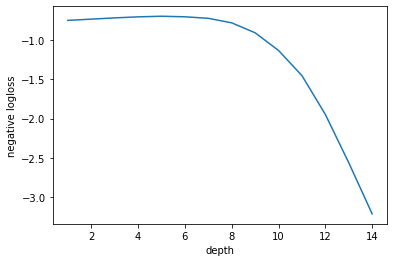

In [22]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [23]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 5


从这开始写， tune parameter 的话可以是换solver（logistics）, kernel and C(SVM)

#### 2.More features

In [24]:
def date_to_month(d):
    d=pd.to_datetime(d)
    return d

In [25]:
date = np.vectorize(date_to_month)

In [26]:
t['dateTime'] = date(t['created'])
testing['dateTime'] = date(testing['created'])

In [27]:
t['year'] = t['dateTime'].dt.year
t['month'] = t['dateTime'].dt.month
t['day'] = t['dateTime'].dt.day
t['hour'] = t['dateTime'].dt.hour
t['minute'] = t['dateTime'].dt.minute

testing['year'] = testing['dateTime'].dt.year
testing['month'] = testing['dateTime'].dt.month
testing['day'] = testing['dateTime'].dt.day
testing['hour'] = testing['dateTime'].dt.hour
testing['minute'] = testing['dateTime'].dt.minute

In [121]:
featureSelect = featureSelect + ['year','month','day','hour','minute']

In [124]:
X_pred = testing[featureSelect]
X = t[featureSelect]
y = t['interest_level']

In [74]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

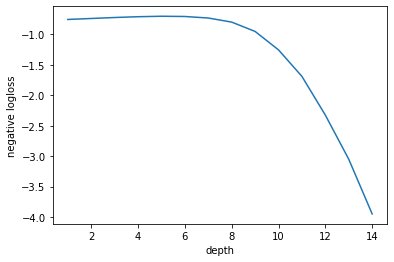

In [75]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [76]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 5


In [129]:
treeModel = DecisionTreeClassifier(max_depth = 5)

In [92]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

-0.6860195382886515

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
treeModel.score(X,y)

0.7055940147052501

In [96]:
predLable = treeModel.predict_proba(X_pred)

In [97]:
outputCSV(predLable)

logloss:0.70834(depth = 5) 0.71338(depth = 4) 0.71477 (depth = 6) 0.73024 (depth = 7) 1.33995(depth = 10)

#### 3.Add categorical features

In [40]:
def list2str(list):
    return " ".join([i.replace(' ', '_') for i in list])

In [41]:
list2str = np.vectorize(list2str)

In [42]:
t['featuresStr'] = list2str(t['features'])
testing['featuresStr'] = list2str(testing['features'])

In [122]:
tf =  CountVectorizer(max_features=250, stop_words='english',max_df=0.6)
tr_sparse = tf.fit_transform(t["featuresStr"])
te_sparse = tf.transform(testing["featuresStr"])
X = sparse.hstack([t[featureSelect], tr_sparse])
X_pred = sparse.hstack([testing[featureSelect], te_sparse])

In [44]:
k_range = range(1,9)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

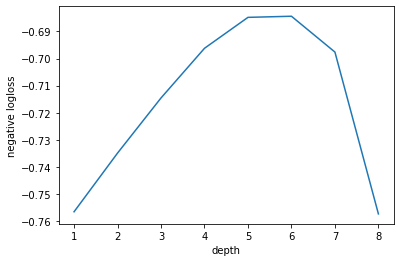

In [45]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [46]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,9):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 6


In [47]:
treeModel = DecisionTreeClassifier(max_depth = 6)

In [48]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
treeModel.score(X,y)

0.7155695059551963

In [50]:
predLable = treeModel.predict_proba(X_pred)

In [51]:
outputCSV(predLable)

logloss: 0.69182(d = 5) 0.68476(d=6)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')